In [43]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
import pandas as pd

data = np.genfromtxt("13-month smoothed monthly total sunspot number 1-1749 to now.csv", delimiter=';')
år = data[:,0]
måned = data[:,1]
dato_fraction = data[:,2]
SN = data[:,3]
std = data[:,4]
N = data[:,5]
definite = data[:,6]

In [29]:
Dato_brøkdel = []
SSN = []
Usikker_SSN = []

for i in range(len(dato_fraction)):
    if N[i] > 0 and SN[i] >= 0:
        SSN.append(SN[i])
        Dato_brøkdel.append(dato_fraction[i])
        Usikker_SSN.append(abs(std[i]/np.sqrt(N[i])))

SSN = np.array(SSN)
Dato_brøkdel = np.array(Dato_brøkdel)
Usikker_SSN = np.array(Usikker_SSN)

Proxy_minimum_dato = np.array([1755+2/13 , 1766+6/13 , 1775+6/13 , 1784+9/13 , 1798+4/13 , 1810+7/13 , 1823+5/13 , 1833+11/13 , 1843+7/13, 1855+12/13,
                    1867+3/13 , 1878+12/13 , 1890+3/13 , 1902+1/13 , 1913+7/13 , 1923+8/13 , 1933+9/13 , 1944+2/13 , 1954+4/13 , 1964+10/12,
                    1976+3/13 , 1986+9/13 , 1996+8/13 , 2008+12/13 , 2019+12/13])

In [40]:
Cykler = []
for k in range( len(Proxy_minimum_dato)-1 ):
    Maske=(Proxy_minimum_dato[k] < Dato_brøkdel) & (Dato_brøkdel < Proxy_minimum_dato[k+1])
    x = Dato_brøkdel[Maske]
    y = SSN[Maske]
    u = Usikker_SSN[Maske]
    Cykler.append([x,y,u])
    if k == 23:
        Maske=(Cykler[23][0][-1] < Dato_brøkdel) & (Dato_brøkdel < 2025)
        x = Dato_brøkdel[Maske]
        y = SSN[Maske]
        u = Usikker_SSN[Maske]
        Cykler.append([x,y,u])

In [54]:
loc = r"C:\Users\chris\OneDrive\Uni\Data og projekt\Solpletter_projekt\Magnus carlsen\data\WSO_smoothed.csv"

column_names = ['Date', 'Magnetic_field' , 'Usikkerhed']
wso_smoothed_data = pd.read_csv(loc, names=column_names, delimiter=',', skiprows=1)
Dato_m = wso_smoothed_data['Date'].values.astype(float)
Mag = wso_smoothed_data['Magnetic_field'].values.astype(float)
Usikker_mag = wso_smoothed_data['Usikkerhed'].values.astype(float)

Magnetfelt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for k in range( len(Proxy_minimum_dato[-5:])-1 ):
    Maske=(Proxy_minimum_dato[-5:][k] < Dato_m) & (Dato_m < Proxy_minimum_dato[-5:][k+1])
    x = Dato_m[Maske]
    y = Mag[Maske]
    u = Usikker_mag[Maske]
    Magnetfelt.append([x,y,u])
    if k == 3:
        Maske=(Magnetfelt[23][0][-1] < Dato_m) & (Dato_m < 2025)
        x = Dato_m[Maske]
        y = Mag[Maske]
        u = Usikker_mag[Maske]
        Magnetfelt.append([x,y,u])


1976.8360711841208


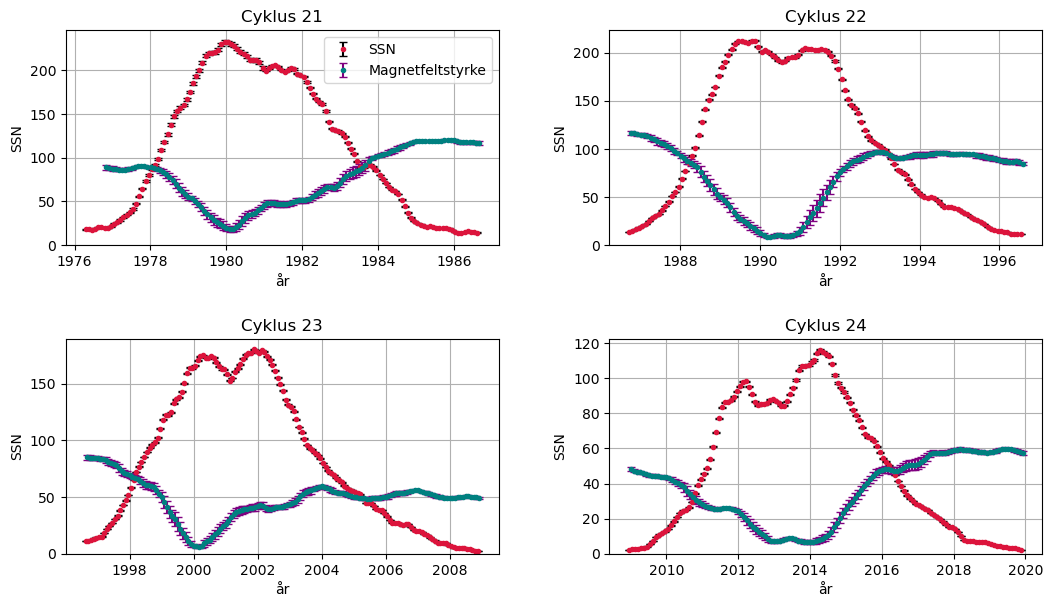

In [77]:
#Størrelse af billede
plt.figure(figsize=(14,8))

#Der laves et stort billede, hvorpå 4 forskellige plots vil være jævnt fordelt:
#Plot over x-position som funktion af tid:
plot1=plt.subplot2grid((100,100),(0,0),rowspan=35,colspan=40)
plot1.set_title('Cyklus 21')
plot1.errorbar(*Cykler[20], fmt='.' , capsize=3 , color='crimson' , ecolor='black' , label='SSN')
plot1.errorbar(*Magnetfelt[20], fmt='.' , capsize=3, color='teal' , ecolor='purple' , label='Magnetfeltstyrke')
plot1.set_xlabel('år')
plot1.set_ylabel('SSN')
plot1.set_ylim(0)
plot1.grid()
plot1.legend()

#Plot over x- og y-position:
plot2=plt.subplot2grid((100,100),(0,50),rowspan=35, colspan=40)
plot2.set_title('Cyklus 22')
plot2.errorbar(*Cykler[21], fmt='.' , capsize=3, color='crimson' , ecolor='black')
plot2.errorbar(*Magnetfelt[21], fmt='.' , capsize=3, color='teal' , ecolor='purple')
plot2.set_xlabel('år')
plot2.set_ylabel('SSN')
plot2.set_ylim(0)
plot2.grid()


#Plot over y-position som funktion af tid:
plot3=plt.subplot2grid((100,100),(50,0),rowspan=35, colspan=40)
plot3.set_title('Cyklus 23')
plot3.errorbar(*Cykler[22], fmt='.' , capsize=3, color='crimson' , ecolor='black')
plot3.errorbar(*Magnetfelt[22], fmt='.' , capsize=3, color='teal' , ecolor='purple')
plot3.set_xlabel('år')
plot3.set_ylabel('SSN')
plot3.set_ylim(0)
plot3.grid()


#Plot over fart som funktion af tid
plot4=plt.subplot2grid((100,100),(50,50),rowspan=35, colspan=40)
plot4.set_title('Cyklus 24')
plot4.errorbar(*Cykler[23], fmt='.' , capsize=3, color='crimson' , ecolor='black')
plot4.errorbar(*Magnetfelt[23], fmt='.' , capsize=3, color='teal' , ecolor='purple')
plot4.set_xlabel('år')
plot4.set_ylabel('SSN')
plot4.set_ylim(0)
plot4.grid()

print(Dato_m[0])

<ErrorbarContainer object of 3 artists>

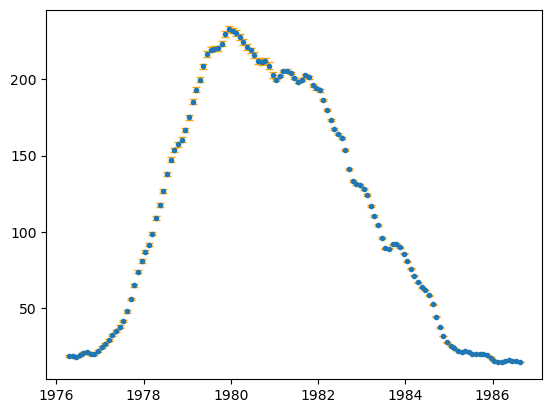

In [48]:
plt.errorbar(*Cykler[20], fmt='.' , capsize=3, ecolor='orange')